In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [4]:
perf_by_day = pd.read_csv('performance_per_day_route.csv')
perf_by_day.columns 

Index(['date', 'route_id', 'direction', 'schd_depart_hour', 'wait_time', 'otp',
       'schd_hw_avg', 'hw_avg', 'pct_delivered', 'tot_trips', 'ons', 'year',
       'trips_observed'],
      dtype='object')

In [205]:
perf_by_day.sort_values(by="wait_time", ascending=False)
perf_by_day_filtered = perf_by_day[(perf_by_day["schd_hw_avg"] < 30) & (perf_by_day["wait_time"] < 60)]

In [206]:

scheduled_headway_by_route = perf_by_day_filtered.groupby('route_id')["schd_hw_avg"].mean()

high_freq_mean_hw = scheduled_headway_by_route[scheduled_headway_by_route < 15].mean()
low_freq_mean_hw = scheduled_headway_by_route[scheduled_headway_by_route >= 15].mean()

high_freq_routes = scheduled_headway_by_route[scheduled_headway_by_route < 15].index.tolist()
low_freq_routes = scheduled_headway_by_route[scheduled_headway_by_route >= 15].index.tolist()



In [211]:
num_routes = perf_by_day["route_id"].nunique()
low_freq_pct = (len(low_freq_routes)/num_routes)*100
print('low_freq_pct', low_freq_pct)
print('low_freq_mean_hw', low_freq_mean_hw)

high_freq_pct = (len(high_freq_routes)/num_routes)*100
print('high_freq_pct', high_freq_pct)
print('high_freq_mean_hw', high_freq_mean_hw)

low_freq_pct 60.65573770491803
low_freq_mean_hw 18.883550153855797
high_freq_pct 39.34426229508197
high_freq_mean_hw 12.673797107688573


### High Frequency Routes Model

In [208]:
high_frequency_data.columns 

Index(['date', 'route_id', 'direction', 'schd_depart_hour', 'wait_time', 'otp',
       'schd_hw_avg', 'hw_avg', 'pct_delivered', 'tot_trips', 'ons', 'year',
       'trips_observed'],
      dtype='object')

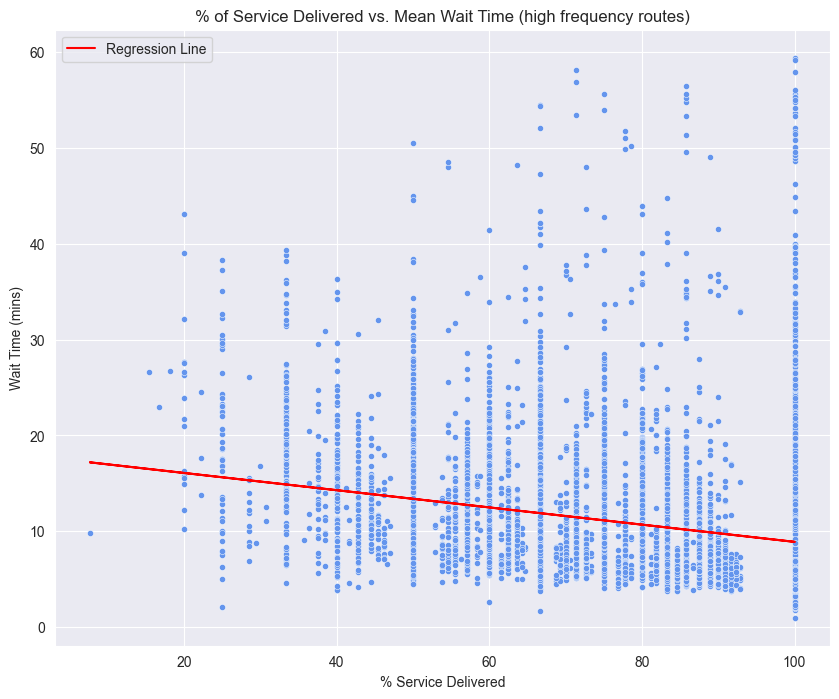

Coefficients: [[-0.08992289]]
Intercept: [17.86874253]
R squared: 0.10254157124179974


In [209]:

model = LinearRegression()

high_frequency_data = perf_by_day_filtered[perf_by_day_filtered["route_id"].isin(high_freq_routes)].dropna(axis=0, how='any')

X = high_frequency_data['pct_delivered'].values.reshape(-1, 1)
y = high_frequency_data['wait_time'].values.reshape(-1, 1)

model.fit(X, y)

# Predict using the model
y_pred = model.predict(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=high_frequency_data, x='pct_delivered', y='wait_time', color='cornflowerblue', marker='o', s=20)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('% Service Delivered')
plt.ylabel('Wait Time (mins)')
plt.title('% of Service Delivered vs. Mean Wait Time (high frequency routes)')
plt.legend()
plt.show()

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print('R squared:', model.score(X, y))


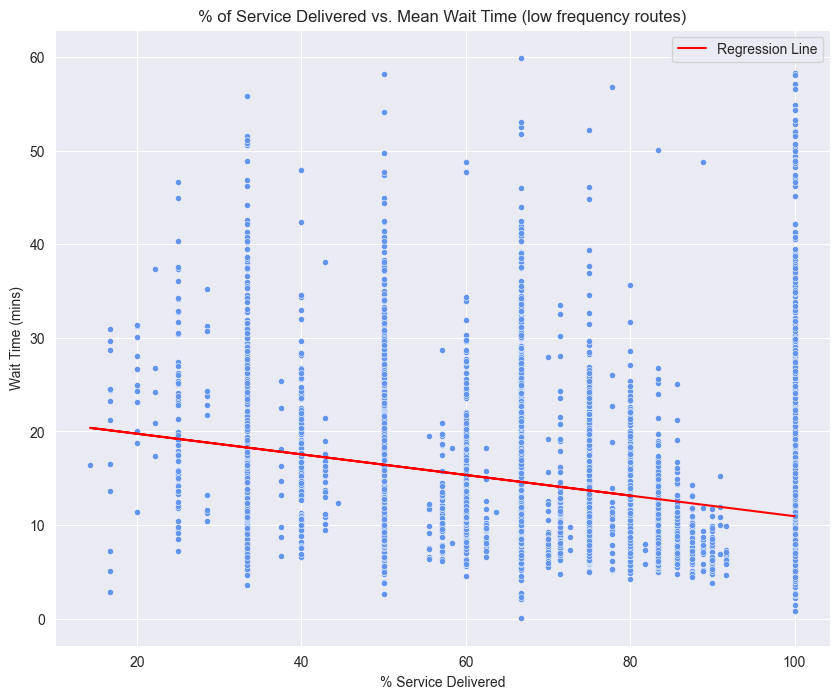

Coefficients: [[-0.1101469]]
Intercept: [21.9638858]
R squared: 0.1352042822974331


In [210]:

model = LinearRegression()

low_frequency_data = perf_by_day_filtered[perf_by_day_filtered["route_id"].isin(low_freq_routes)].dropna(axis=0, how='any')

X = low_frequency_data['pct_delivered'].values.reshape(-1, 1)
y = low_frequency_data['wait_time'].values.reshape(-1, 1)

model.fit(X, y)

# Predict using the model
y_pred = model.predict(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=low_frequency_data, x='pct_delivered', y='wait_time', color='cornflowerblue', marker='o', s=20)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('% Service Delivered')
plt.ylabel('Wait Time (mins)')
plt.title('% of Service Delivered vs. Mean Wait Time (low frequency routes)')
plt.legend()
plt.show()

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print('R squared:', model.score(X, y))

35.939949109414755

In [49]:
perf_by_day["trips_missing"] = (perf_by_day["tot_trips"]- perf_by_day["trips_observed"])
perf_by_day["pct_missing"] = 100 - perf_by_day["pct_delivered"]

# .astype(int)

perf_by_day['time_period'] = (perf_by_day['schd_depart_hour'] - 1) // 4 

# perf_by_day.sort_values(by="pct_delivered", ascending=True)
# perf_by_day['pct_delivered'] = pd.to_numeric(perf_by_day['pct_delivered'], errors='coerce')


perf_by_day[["route_id", "time_period", "pct_delivered", "pct_missing"]].groupby(["route_id", "time_period"]).mean()
# ["pct_delivered"].head(10)

pct_delivered  pct_missing
route_id time_period                            
1        1                89.482323    10.517677
         2               100.000000     0.000000
         3                88.052632    11.947368
         4                90.462963     9.537037
100      1                94.588889     5.411111
...                             ...          ...
X9       0               100.000000     0.000000
         1                87.010058    12.989942
         2                93.939394     6.060606
         3                86.587302    13.412698
         4                89.047619    10.952381

[649 rows x 2 columns]

In [41]:
perf_by_day.columns 

Index(['date', 'route_id', 'direction', 'schd_depart_hour', 'wait_time', 'otp',
       'schd_hw_avg', 'hw_avg', 'pct_delivered', 'tot_trips', 'ons', 'year',
       'trips_observed', 'trips_delivered', 'time_period', 'trips_missing'],
      dtype='object')